<a href="https://colab.research.google.com/github/asdfasdf0311/Kswproject/blob/main/Deeper_Insight_for_Conference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.stats import pearsonr

In [2]:
# 'DejaVu Sans' 폰트를 설정
plt.rcParams['font.family'] = 'DejaVu Sans'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dat = pd.read_excel('/content/drive/MyDrive/KSWProject/data/intersection_list.xlsx')#실험한모든정보가들어있다.

data = pd.read_excel('/content/drive/MyDrive/KSWProject/data/intersectiondata.xlsx')#rawdata
data2 = pd.read_excel('/content/drive/MyDrive/KSWProject/data/datawithmean.xlsx')#datawithmean,iqr
data_ah = pd.read_excel('/content/drive/MyDrive/KSWProject/data/datawithmean_AH.xlsx')#AH - datawithmean,iqr
data_lora = pd.read_excel('/content/drive/MyDrive/KSWProject/data/datawithmean_LoRa.xlsx')#LoRa - datawithmean,iqr

df_lora_rssi = pd.read_excel('/content/drive/MyDrive/KSWProject/data/RSSI_LoRa.xlsx')
df_lora_snr = pd.read_excel('/content/drive/MyDrive/KSWProject/data/SNR_LoRa.xlsx')
df_ah_rssi = pd.read_csv('/content/drive/MyDrive/KSWProject/data/RSSI_AH_100.csv')
df_ah_snr = pd.read_excel('/content/drive/MyDrive/KSWProject/data/SNR_AH.xlsx')

In [6]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   point_num            17 non-null     object 
 1   x                    17 non-null     float64
 2   y                    17 non-null     float64
 3   distance             17 non-null     int64  
 4   intersection         17 non-null     int64  
 5   AH_success           17 non-null     int64  
 6   LoRa_success         17 non-null     int64  
 7   LOS                  12 non-null     float64
 8   AH_obstruction(%)    12 non-null     float64
 9   LoRa_obstruction(%)  12 non-null     float64
 10  AH_rssi_min          12 non-null     float64
 11  AH_rssi_q1           12 non-null     float64
 12  AH_rssi_median       12 non-null     float64
 13  AH_rssi_q3           12 non-null     float64
 14  AH_rssi_max          12 non-null     float64
 15  AH_rssi_iqr          12 non-null     float

이와 같은 작은 데이터셋에서는 전통적인 머신러닝 모델보다는 통계적 분석과 시각화 기법을 활용하여 깊이 있는 통찰을 얻는 것이 더 적합

In [7]:
data_ah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   point_num          12 non-null     object 
 1   distance           12 non-null     int64  
 2   LOS                12 non-null     int64  
 3   AH_obstruction(%)  12 non-null     float64
 4   AH_rssi_iqr        12 non-null     float64
 5   AH_rssi_mean       12 non-null     float64
 6   AH_snr_iqr         12 non-null     float64
 7   AH_snr_mean        12 non-null     float64
 8   AH_put             12 non-null     float64
dtypes: float64(6), int64(2), object(1)
memory usage: 992.0+ bytes


In [8]:
data_lora.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   point_num            17 non-null     object 
 1   distance             17 non-null     int64  
 2   LOS                  17 non-null     int64  
 3   LoRa_obstruction(%)  17 non-null     float64
 4   LoRa_rssi_iqr        17 non-null     float64
 5   LoRa_rssi_mean       17 non-null     float64
 6   LoRa_snr_iqr         17 non-null     float64
 7   LoRa_snr_mean        17 non-null     float64
 8   LoRa_put             17 non-null     float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.3+ KB


In [9]:
# 데이터 로드 (예시: CSV 파일에서 로드)
# data_ah = pd.read_csv('data_ah.csv')
# data_lora = pd.read_csv('data_lora.csv')

# 데이터프레임 복사 (원본 데이터 보호)
data_ah_renamed = data_ah.copy()
data_lora_renamed = data_lora.copy()

# 컬럼명 일관성 맞추기
# 802.11ah 데이터 컬럼명 변경
data_ah_renamed = data_ah_renamed.rename(columns={
    'AH_obstruction(%)': 'obstruction_pct',
    'AH_rssi_iqr': 'rssi_iqr',
    'AH_rssi_mean': 'rssi_mean',
    'AH_snr_iqr': 'snr_iqr',
    'AH_snr_mean': 'snr_mean',
    'AH_put': 'put'
})

# LoRaWAN 데이터 컬럼명 변경
data_lora_renamed = data_lora_renamed.rename(columns={
    'LoRa_obstruction(%)': 'obstruction_pct',
    'LoRa_rssi_iqr': 'rssi_iqr',
    'LoRa_rssi_mean': 'rssi_mean',
    'LoRa_snr_iqr': 'snr_iqr',
    'LoRa_snr_mean': 'snr_mean',
    'LoRa_put': 'put'
})

# 'Technology' 열 추가
data_ah_renamed['Technology'] = '802.11ah'
data_lora_renamed['Technology'] = 'LoRaWAN'

# 필요한 컬럼 선택
common_columns = ['point_num', 'distance', 'LOS', 'obstruction_pct',
                 'rssi_iqr', 'rssi_mean', 'snr_iqr', 'snr_mean', 'put', 'Technology']

data_ah_selected = data_ah_renamed[common_columns]
data_lora_selected = data_lora_renamed[common_columns]

# 데이터프레임 합치기
data_combined = pd.concat([data_ah_selected, data_lora_selected], ignore_index=True)

# 데이터 확인
print("통합 데이터프레임 정보:")
print(data_combined.info())


통합 데이터프레임 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   point_num        29 non-null     object 
 1   distance         29 non-null     int64  
 2   LOS              29 non-null     int64  
 3   obstruction_pct  29 non-null     float64
 4   rssi_iqr         29 non-null     float64
 5   rssi_mean        29 non-null     float64
 6   snr_iqr          29 non-null     float64
 7   snr_mean         29 non-null     float64
 8   put              29 non-null     float64
 9   Technology       29 non-null     object 
dtypes: float64(6), int64(2), object(2)
memory usage: 2.4+ KB
None


### 결측치 - 없음

In [16]:
# 결측치 확인
print("\n결측치 개수:")
print(data_combined.isnull().sum())

# 결측치 처리: 평균값으로 대체
numeric_columns = ['distance', 'LOS', 'obstruction_pct',
                   'rssi_iqr', 'rssi_mean', 'snr_iqr', 'snr_mean', 'put']

data_combined[numeric_columns] = data_combined[numeric_columns].fillna(data_combined[numeric_columns].mean())


결측치 개수:
point_num          0
distance           0
LOS                0
obstruction_pct    0
rssi_iqr           0
rssi_mean          0
snr_iqr            0
snr_mean           0
put                0
Technology         0
dtype: int64


## 데이터 정규화

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_combined[numeric_columns] = scaler.fit_transform(data_combined[numeric_columns])

# 정규화된 데이터 확인
print("\n정규화된 데이터:")
print(data_combined.head())


정규화된 데이터:
  point_num  distance       LOS  obstruction_pct  rssi_iqr  rssi_mean  \
0   point 1 -0.563192  1.490712        -1.409400  0.030882   1.093943   
1   point 2 -0.528851  1.490712        -1.409400 -0.446761   0.564310   
2   point 3 -0.494510 -0.670820         0.919523  0.269704   0.571246   
3   point 4 -0.467037 -0.670820         0.919523 -0.207940   0.376417   
4   point 5 -0.446433 -0.670820         0.919523 -0.685583   0.761661   

    snr_iqr  snr_mean       put Technology  
0 -0.746109  1.612012  0.839810   802.11ah  
1 -0.804850  1.055563  1.186147   802.11ah  
2 -0.790165  1.083836  0.173567   802.11ah  
3 -0.317975  0.636785  0.390791   802.11ah  
4 -0.789035  0.956138  0.555916   802.11ah  


## 탐색적 데이터 분석 (EDA)

### 요약통계량

In [18]:
# 기술별 요약 통계
print("\n기술별 요약 통계:")
print(data_combined.groupby('Technology')[numeric_columns].describe())


기술별 요약 통계:
           distance                                                    \
              count      mean       std       min       25%       50%   
Technology                                                              
802.11ah       12.0 -0.398355  0.122827 -0.563192 -0.473906 -0.436130   
LoRaWAN        17.0  0.281192  1.264556 -0.563192 -0.446433 -0.336542   

                                 LOS            ...  snr_mean             put  \
                 75%       max count      mean  ...       75%       max count   
Technology                                      ...                             
802.11ah   -0.327956 -0.130496  12.0  0.049690  ...  1.087503  1.612012  12.0   
LoRaWAN     0.350278  3.351680  17.0 -0.035076  ... -0.250907 -0.138852  17.0   

                                                                        \
                mean       std       min       25%       50%       75%   
Technology                                                          

## 시각화

### Box Plot

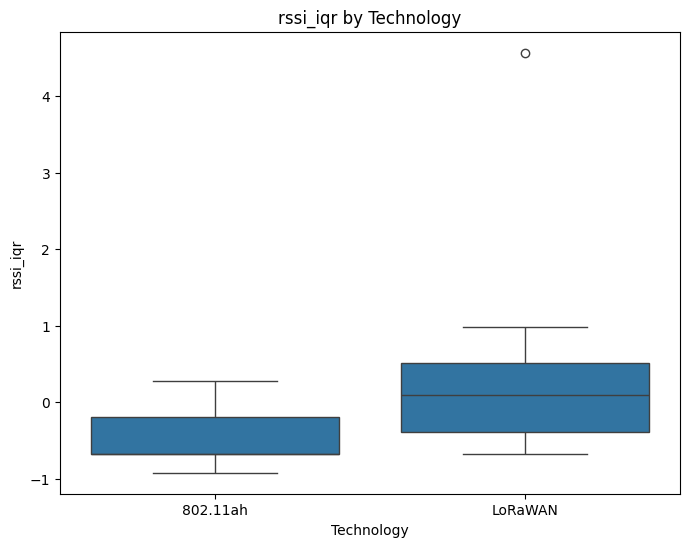

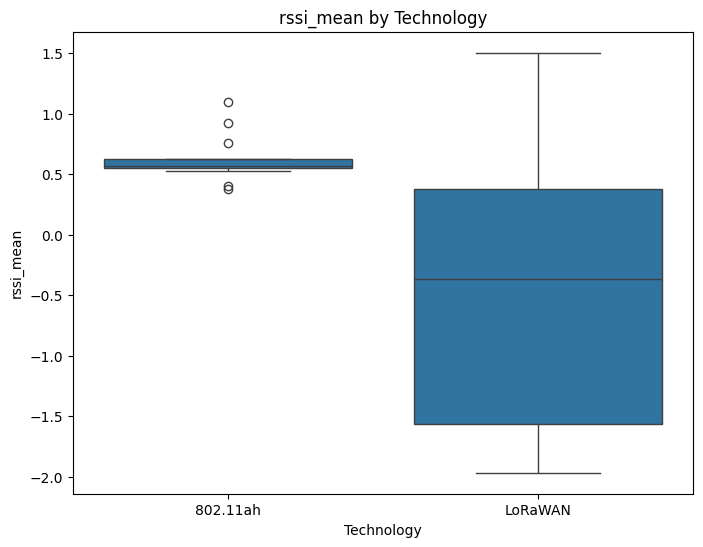

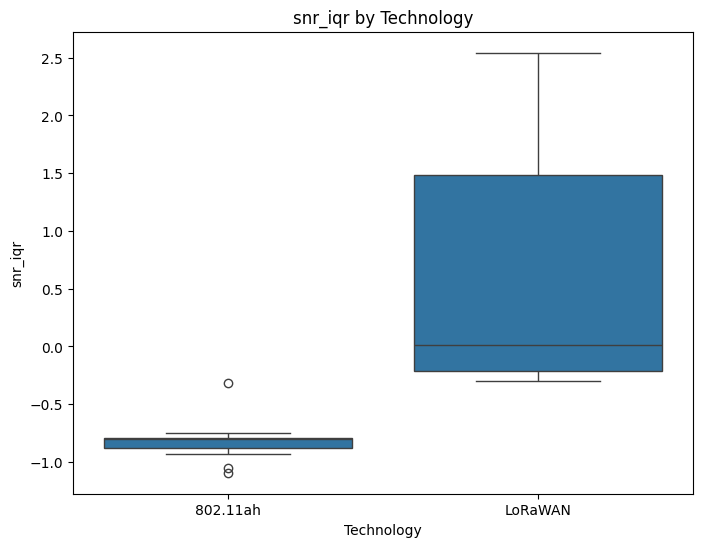

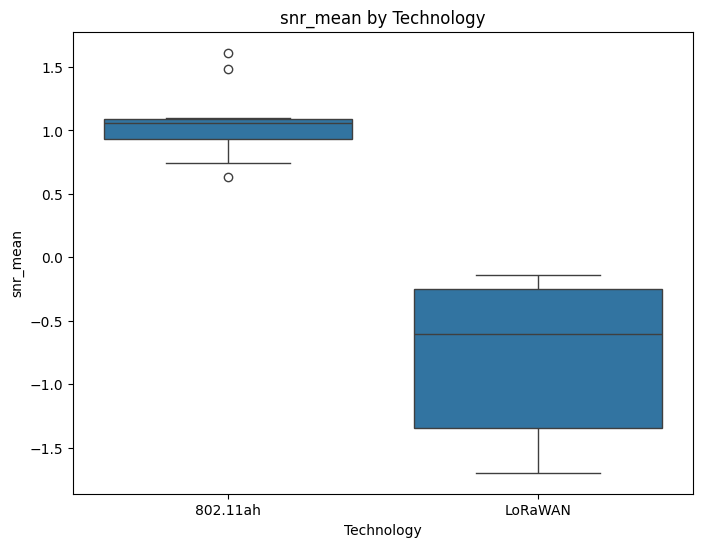

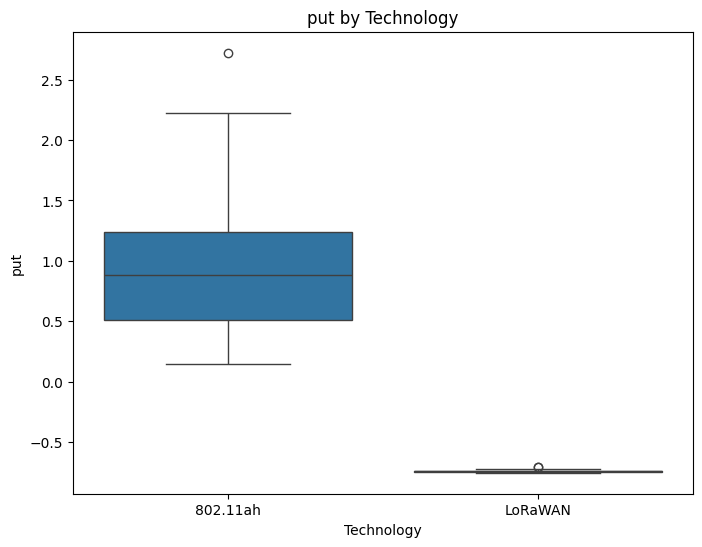

In [19]:
# 박스플롯 그리기
for metric in ['rssi_iqr', 'rssi_mean', 'snr_iqr', 'snr_mean', 'put']:
    plt.figure(figsize=(8,6))
    sns.boxplot(x='Technology', y=metric, data=data_combined)
    plt.title(f'{metric} by Technology')
    plt.show()

### 히스토그램, KDE Plot

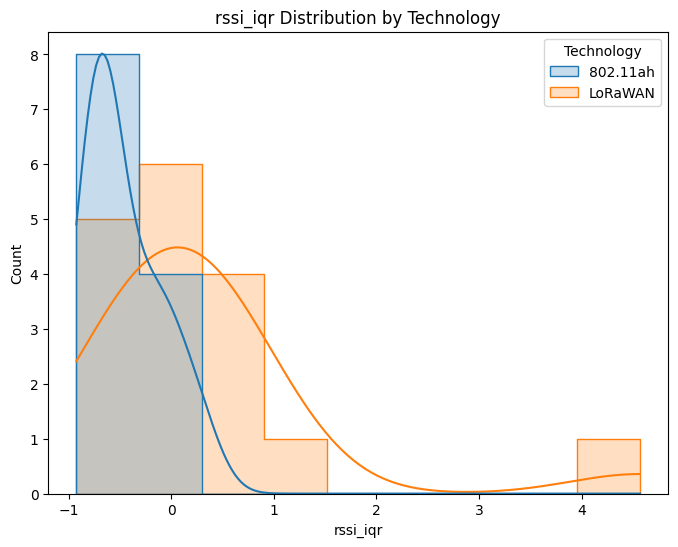

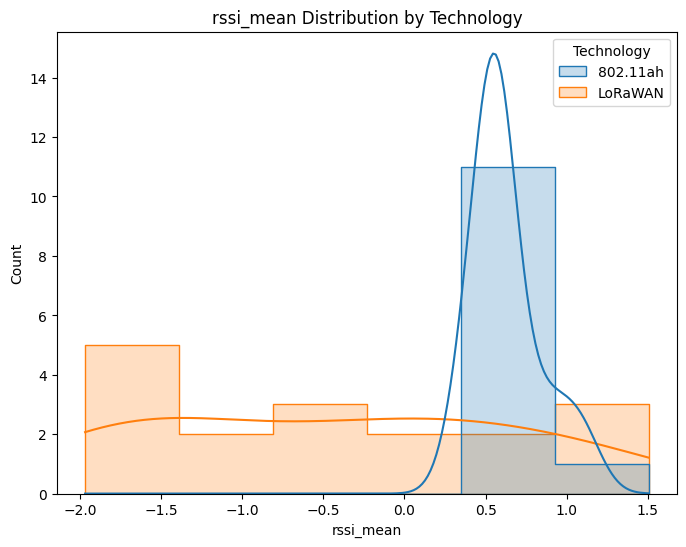

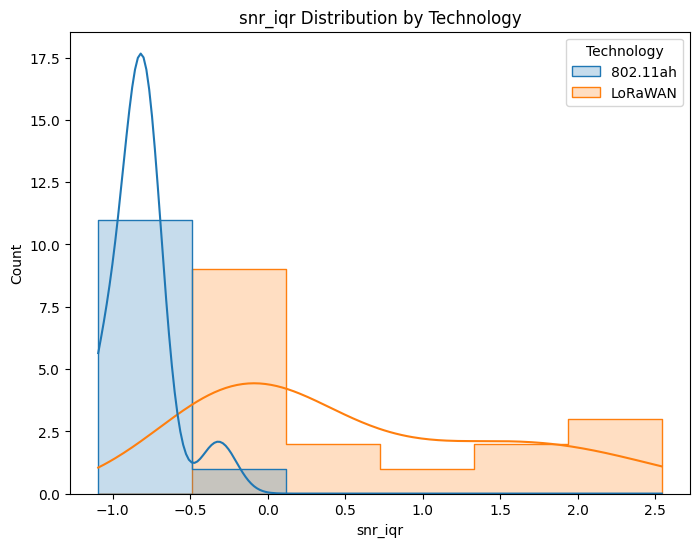

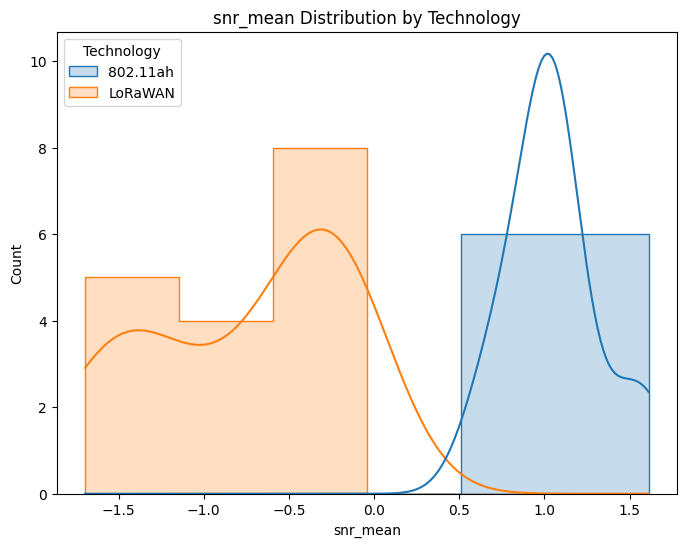

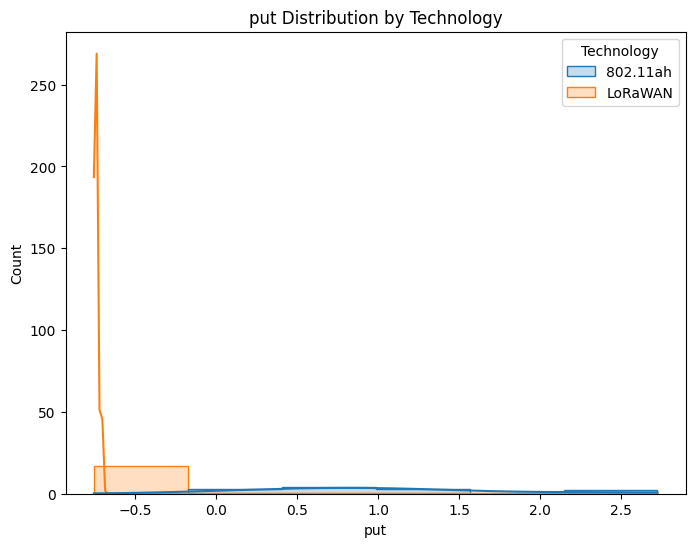

In [20]:
# 히스토그램 및 KDE 플롯
for metric in ['rssi_iqr', 'rssi_mean', 'snr_iqr', 'snr_mean', 'put']:
    plt.figure(figsize=(8,6))
    sns.histplot(data=data_combined, x=metric, hue='Technology', kde=True, element='step')
    plt.title(f'{metric} Distribution by Technology')
    plt.show()

### 상관관계 분석

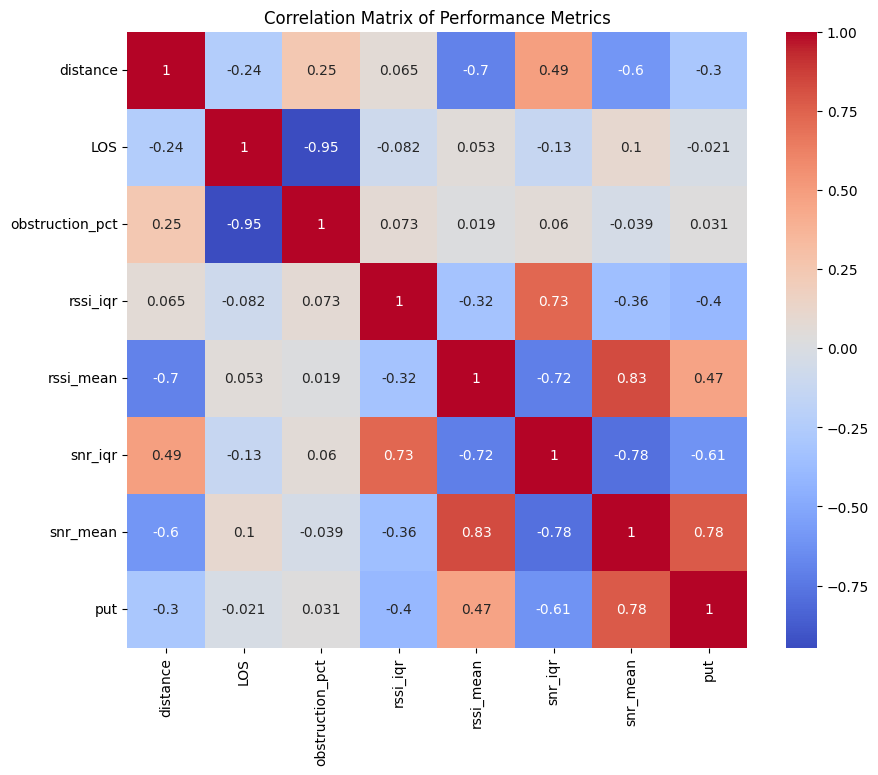

In [21]:
# 상관 행렬 계산
corr_matrix = data_combined[numeric_columns].corr()

# 히트맵 시각화
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Performance Metrics')
plt.show()

## 통계적 검정

### 독립 표본 t-검정 (Independent Samples t-Test)

두 기술 간에 특정 성능 지표의 평균 차이가 통계적으로 유의미한지 확인

In [22]:
from scipy.stats import ttest_ind

# t-검정 함수 정의
def perform_ttest(data, group_col, metric):
    group1 = data[data[group_col] == '802.11ah'][metric]
    group2 = data[data[group_col] == 'LoRaWAN'][metric]
    t_stat, p_val = ttest_ind(group1, group2, equal_var=False)  # Welch's t-test
    return t_stat, p_val

# 각 성능 지표에 대해 t-검정 수행
print("\n독립 표본 t-검정 결과:")
for metric in ['rssi_iqr', 'rssi_mean', 'snr_iqr', 'snr_mean', 'put']:
    t_stat, p_val = perform_ttest(data_combined, 'Technology', metric)
    print(f"{metric}: t-statistic = {t_stat:.3f}, p-value = {p_val:.3f}")



독립 표본 t-검정 결과:
rssi_iqr: t-statistic = -2.539, p-value = 0.020
rssi_mean: t-statistic = 3.797, p-value = 0.001
snr_iqr: t-statistic = -5.798, p-value = 0.000
snr_mean: t-statistic = 11.230, p-value = 0.000
put: t-statistic = 7.924, p-value = 0.000


p-value < 0.05: 두 그룹 간의 평균 차이가 통계적으로 유의미함.

즉, LoRaWAN과 802.11ah의 모든 성능 변수들간의 차이는 유의미함.

### 다변량 분산 분석 (MANOVA)

In [23]:
from statsmodels.multivariate.manova import MANOVA

# 종속 변수 설정
dependent_vars = ['rssi_iqr', 'rssi_mean', 'snr_iqr', 'snr_mean', 'put']

# MANOVA 수행
manova = MANOVA.from_formula('rssi_iqr + rssi_mean + snr_iqr + snr_mean + put ~ Technology', data=data_combined)
print("\nMANOVA 결과:")
print(manova.mv_test())


MANOVA 결과:
                  Multivariate linear model
                                                             
-------------------------------------------------------------
       Intercept         Value  Num DF  Den DF F Value Pr > F
-------------------------------------------------------------
          Wilks' lambda  0.0776 5.0000 23.0000 54.7149 0.0000
         Pillai's trace  0.9224 5.0000 23.0000 54.7149 0.0000
 Hotelling-Lawley trace 11.8945 5.0000 23.0000 54.7149 0.0000
    Roy's greatest root 11.8945 5.0000 23.0000 54.7149 0.0000
-------------------------------------------------------------
                                                             
-------------------------------------------------------------
       Technology        Value  Num DF  Den DF F Value Pr > F
-------------------------------------------------------------
          Wilks' lambda  0.0470 5.0000 23.0000 93.3372 0.0000
         Pillai's trace  0.9530 5.0000 23.0000 93.3372 0.0000
 Hotelling-Law

* 모델의 전체적 유의성: Intercept와 Technology 모두에서 모든 다변량 검정 통계량이 유의미한 p-값을 가지므로, 전체 모델이 통계적으로 유의미함을 알 수 있다.

* Technology의 영향: Technology 요인이 종속 변수들에 미치는 영향이 통계적으로 매우 강력하게 나타났습니다. 이는 기술의 차이에 따라 종속 변수들이 유의하게 변화함을 의미합니다.

## 다변량 분석

### 랜덤 포레스트를 이용한 분류 및 특성 중요도 분석
랜덤 포레스트 모델을 사용하여 기술을 분류하고, 각 특성의 중요도를 분석합니다.

In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# 특징과 타겟 설정
X = data_combined[dependent_vars]
y = data_combined['Technology']

# 데이터 분할 (작은 데이터셋을 고려하여 신중하게 분할)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


랜덤 포레스트 모델 성능:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

    802.11ah       1.00      1.00      1.00         2
     LoRaWAN       1.00      1.00      1.00         4

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



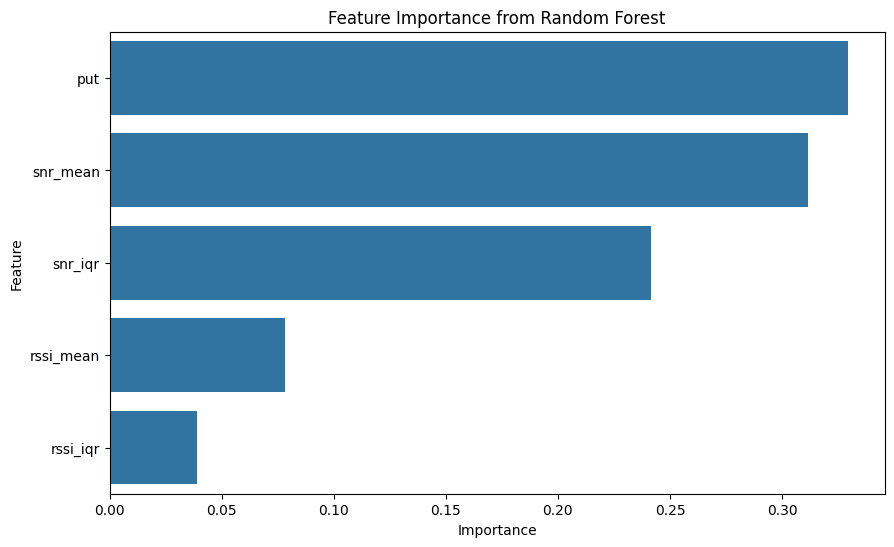

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# 랜덤 포레스트 모델 초기화
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# 모델 학습
rf.fit(X_train, y_train)

# 예측
y_pred_rf = rf.predict(X_test)

# 성능 평가
print("\n랜덤 포레스트 모델 성능:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# 특성 중요도 추출
importances = rf.feature_importances_
feature_importance = pd.Series(importances, index=dependent_vars).sort_values(ascending=False)

# 특성 중요도 시각화
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


## 최종 결론

In [31]:
# 기술별 평균 성능 지표 비교
summary = data_combined.groupby('Technology')[numeric_columns].mean()
print("\n기술별 평균 성능 지표:")
print(summary)



기술별 평균 성능 지표:
            distance       LOS  obstruction_pct  rssi_iqr  rssi_mean  \
Technology                                                             
802.11ah   -0.398355  0.049690         0.017065 -0.461688   0.625523   
LoRaWAN     0.281192 -0.035076        -0.012046  0.325897  -0.441546   

             snr_iqr  snr_mean       put  
Technology                                
802.11ah   -0.817653  1.056665  1.044348  
LoRaWAN     0.577167 -0.745881 -0.737186  


### 지표 설명

* distance (거리): 신호 전파에 영향을 미치는 거리의 효과를 나타냅니다. 값이 클수록 거리에 따른 성능 저하가 적음을 의미할 수 있습니다.
* LOS (Line of Sight, 시선 확보 여부): 직선 경로의 신호 전파 여부를 나타냅니다. 양수 값은 LOS가 성능에 긍정적인 영향을 미침을 의미하고, 음수 값은 부정적인 영향을 미침을 나타낼 수 있습니다.
* obstruction_pct (장애물 비율): 신호 경로에 장애물이 있는 비율을 의미합니다. 값이 클수록 장애물로 인한 성능 저하가 클 수 있습니다.
* rssi_iqr (RSSI의 사분위 범위): RSSI(수신 신호 강도 지수)의 변동성을 나타냅니다. 낮은 변동성(음수 값)은 신호 강도가 안정적임을 의미할 수 있습니다.
* rssi_mean (평균 RSSI): 평균 RSSI 값으로, 신호 강도의 평균적인 수준을 나타냅니다. 값이 클수록 신호 강도가 강함을 의미합니다.
* snr_iqr (SNR의 사분위 범위): SNR(신호 대 잡음비)의 변동성을 나타냅니다. 낮은 변동성은 SNR이 안정적임을 의미할 수 있습니다.
* snr_mean (평균 SNR): 평균 SNR 값으로, 신호 대 잡음비의 평균적인 수준을 나타냅니다. 값이 클수록 신호 품질이 좋음을 의미합니다.
* put (Throughput, 처리량): 네트워크의 데이터 처리량을 나타내는 지표입니다. 값이 클수록 더 많은 데이터를 전송할 수 있음을 의미합니다.

### 기술별 지표 비교

**802.11ah**
* distance: -0.398355 → 거리가 증가할수록 성능이 다소 저하됨을 나타냅니다.
* LOS: 0.049690 → LOS가 약간의 긍정적인 영향을 미침을 의미합니다.
* obstruction_pct: 0.017065 → 장애물 비율이 성능에 거의 영향을 미치지 않음을 시사합니다.
* rssi_iqr: -0.461688 → RSSI의 변동성이 낮아 신호가 안정적임을 의미합니다.
* rssi_mean: 0.625523 → 평균 RSSI가 높아 신호 강도가 양호함을 나타냅니다.
* snr_iqr: -0.817653 → SNR의 변동성이 낮아 신호 품질이 안정적임을 의미합니다.
* snr_mean: 1.056665 → 평균 SNR이 높아 신호 품질이 우수함을 나타냅니다.
* put: 1.044348 → 처리량이 매우 높아 네트워크 성능이 우수함을 의미합니다

**LoRaWAN**
* distance: 0.281192 → 거리에 따른 성능 저하가 비교적 적음을 의미합니다.
* LOS: -0.035076 → LOS가 약간의 부정적인 영향을 미침을 나타냅니다.
* obstruction_pct: -0.012046 → 장애물 비율이 성능에 거의 영향을 미치지 않음을 시사합니다.
* rssi_iqr: 0.325897 → RSSI의 변동성이 다소 높아 신호가 불안정할 수 있음을 의미합니다.
* rssi_mean: -0.441546 → 평균 RSSI가 낮아 신호 강도가 다소 약함을 나타냅니다.
* snr_iqr: 0.577167 → SNR의 변동성이 높아 신호 품질이 불안정할 수 있음을 의미합니다.
* snr_mean: -0.745881 → 평균 SNR이 낮아 신호 품질이 좋지 않음을 나타냅니다.
* put: -0.737186 → 처리량이 낮아 네트워크 성능이 다소 부족함을 의미합니다.

## 종합 해석

802.11ah는 평균적으로 RSSI와 SNR이 높고 안정적이며, 처리량(put)이 매우 우수하여 전반적인 네트워크 성능이 뛰어납니다. 다만, 거리에 따른 성능 저하가 약간 존재합니다.

LoRaWAN은 거리에 대한 내성이 상대적으로 높을 수 있으나, RSSI와 SNR이 낮고 변동성이 커 신호 품질이 불안정하며, 처리량이 낮아 네트워크 성능이 802.11ah에 비해 떨어집니다.